# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [4]:
%pip install matplotlib pandas numpy seaborn wordcloud

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
raw_df = pd.read_csv('Data/DataMTP.Fan.csv')


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Columns: 1001 entries, original_request_url to Unnamed: 1000
dtypes: bool(3), float64(969), int64(4), object(25)
memory usage: 670.9+ KB


In [8]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [9]:
reactions

{'like': 236383,
 'love': 161546,
 'haha': 1250,
 'wow': 1935,
 'care': 5789,
 'sad': 167,
 'angry': 44,
 'shares': 12157,
 'comments': 56708}

## Reactions analysis

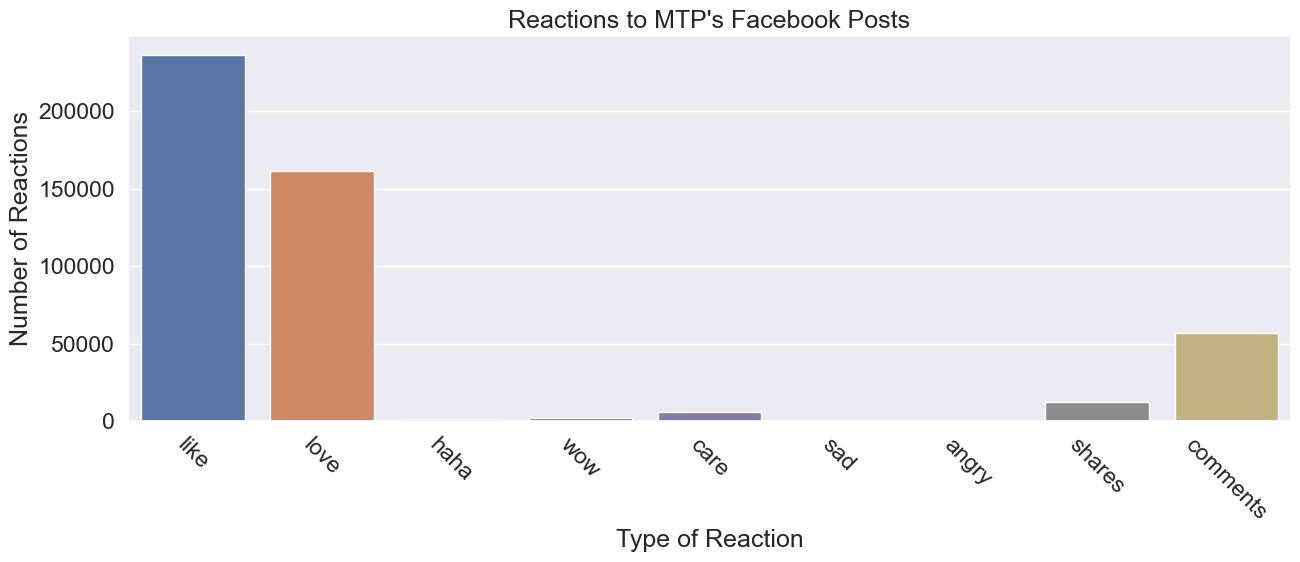

In [10]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to MTP's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [11]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,pfbid0365FumFYrvxgmKJGJzbvd9mmRQyb38GKVPf3pkYy...,MAKING MY WAY will be officially released at 0...
1,pfbid0GMYfP2ZYrSTGqcrCSkFyQTZm3nv3Cn26tdAviYYU...,…🤫
2,pfbid0Ptc6oLei2WFwSWqY3tXhrfQgQSD6RMBKfZCzCKwb...,Quick stroll on Rodeo Drive 🍦✨😌
3,pfbid038GGZxxJkdBDqPUXwVuERDEs2vaW6ZC567hXa71v...,"Finally, I’m here….\n🕊\nLos Angeles… Please tr..."
4,pfbid071RnaDhQGJ4VfFv6rCBpgFYvZcDrof6UzxmJjhLx...,Tràn ngập những cung bậc cảm xúc tuyệt vời bên...
...,...,...
81,pfbid0kekqbxMkEM1jFsn2DdZLFXB3SjdBTyvzN9RdLUgc...,Như đã chia sẻ thì đây là món quà thứ hai mà T...
82,pfbid04A5q1P2ciFCUpaKhEqN3tCwe1JrmbHyCfgjooJKZ...,HƯNG YÊN đêm qua quá SEXY !!!!\n\n🔥🔥🔥
83,pfbid02wHFG4nwMSndXCTfsW4RXHrydpZwSJhiBfUqKw1n...,Lâu lắm không gặp nhau rùi đoáaaaa …. !\n\n🕊🕊🕊
84,pfbid02Rp7DjohLct2YNnpMUptvirLpwT8q8WFVG5J1KXF...,SKY DECADE EP is available on NCT. Enjoy !!!\n...


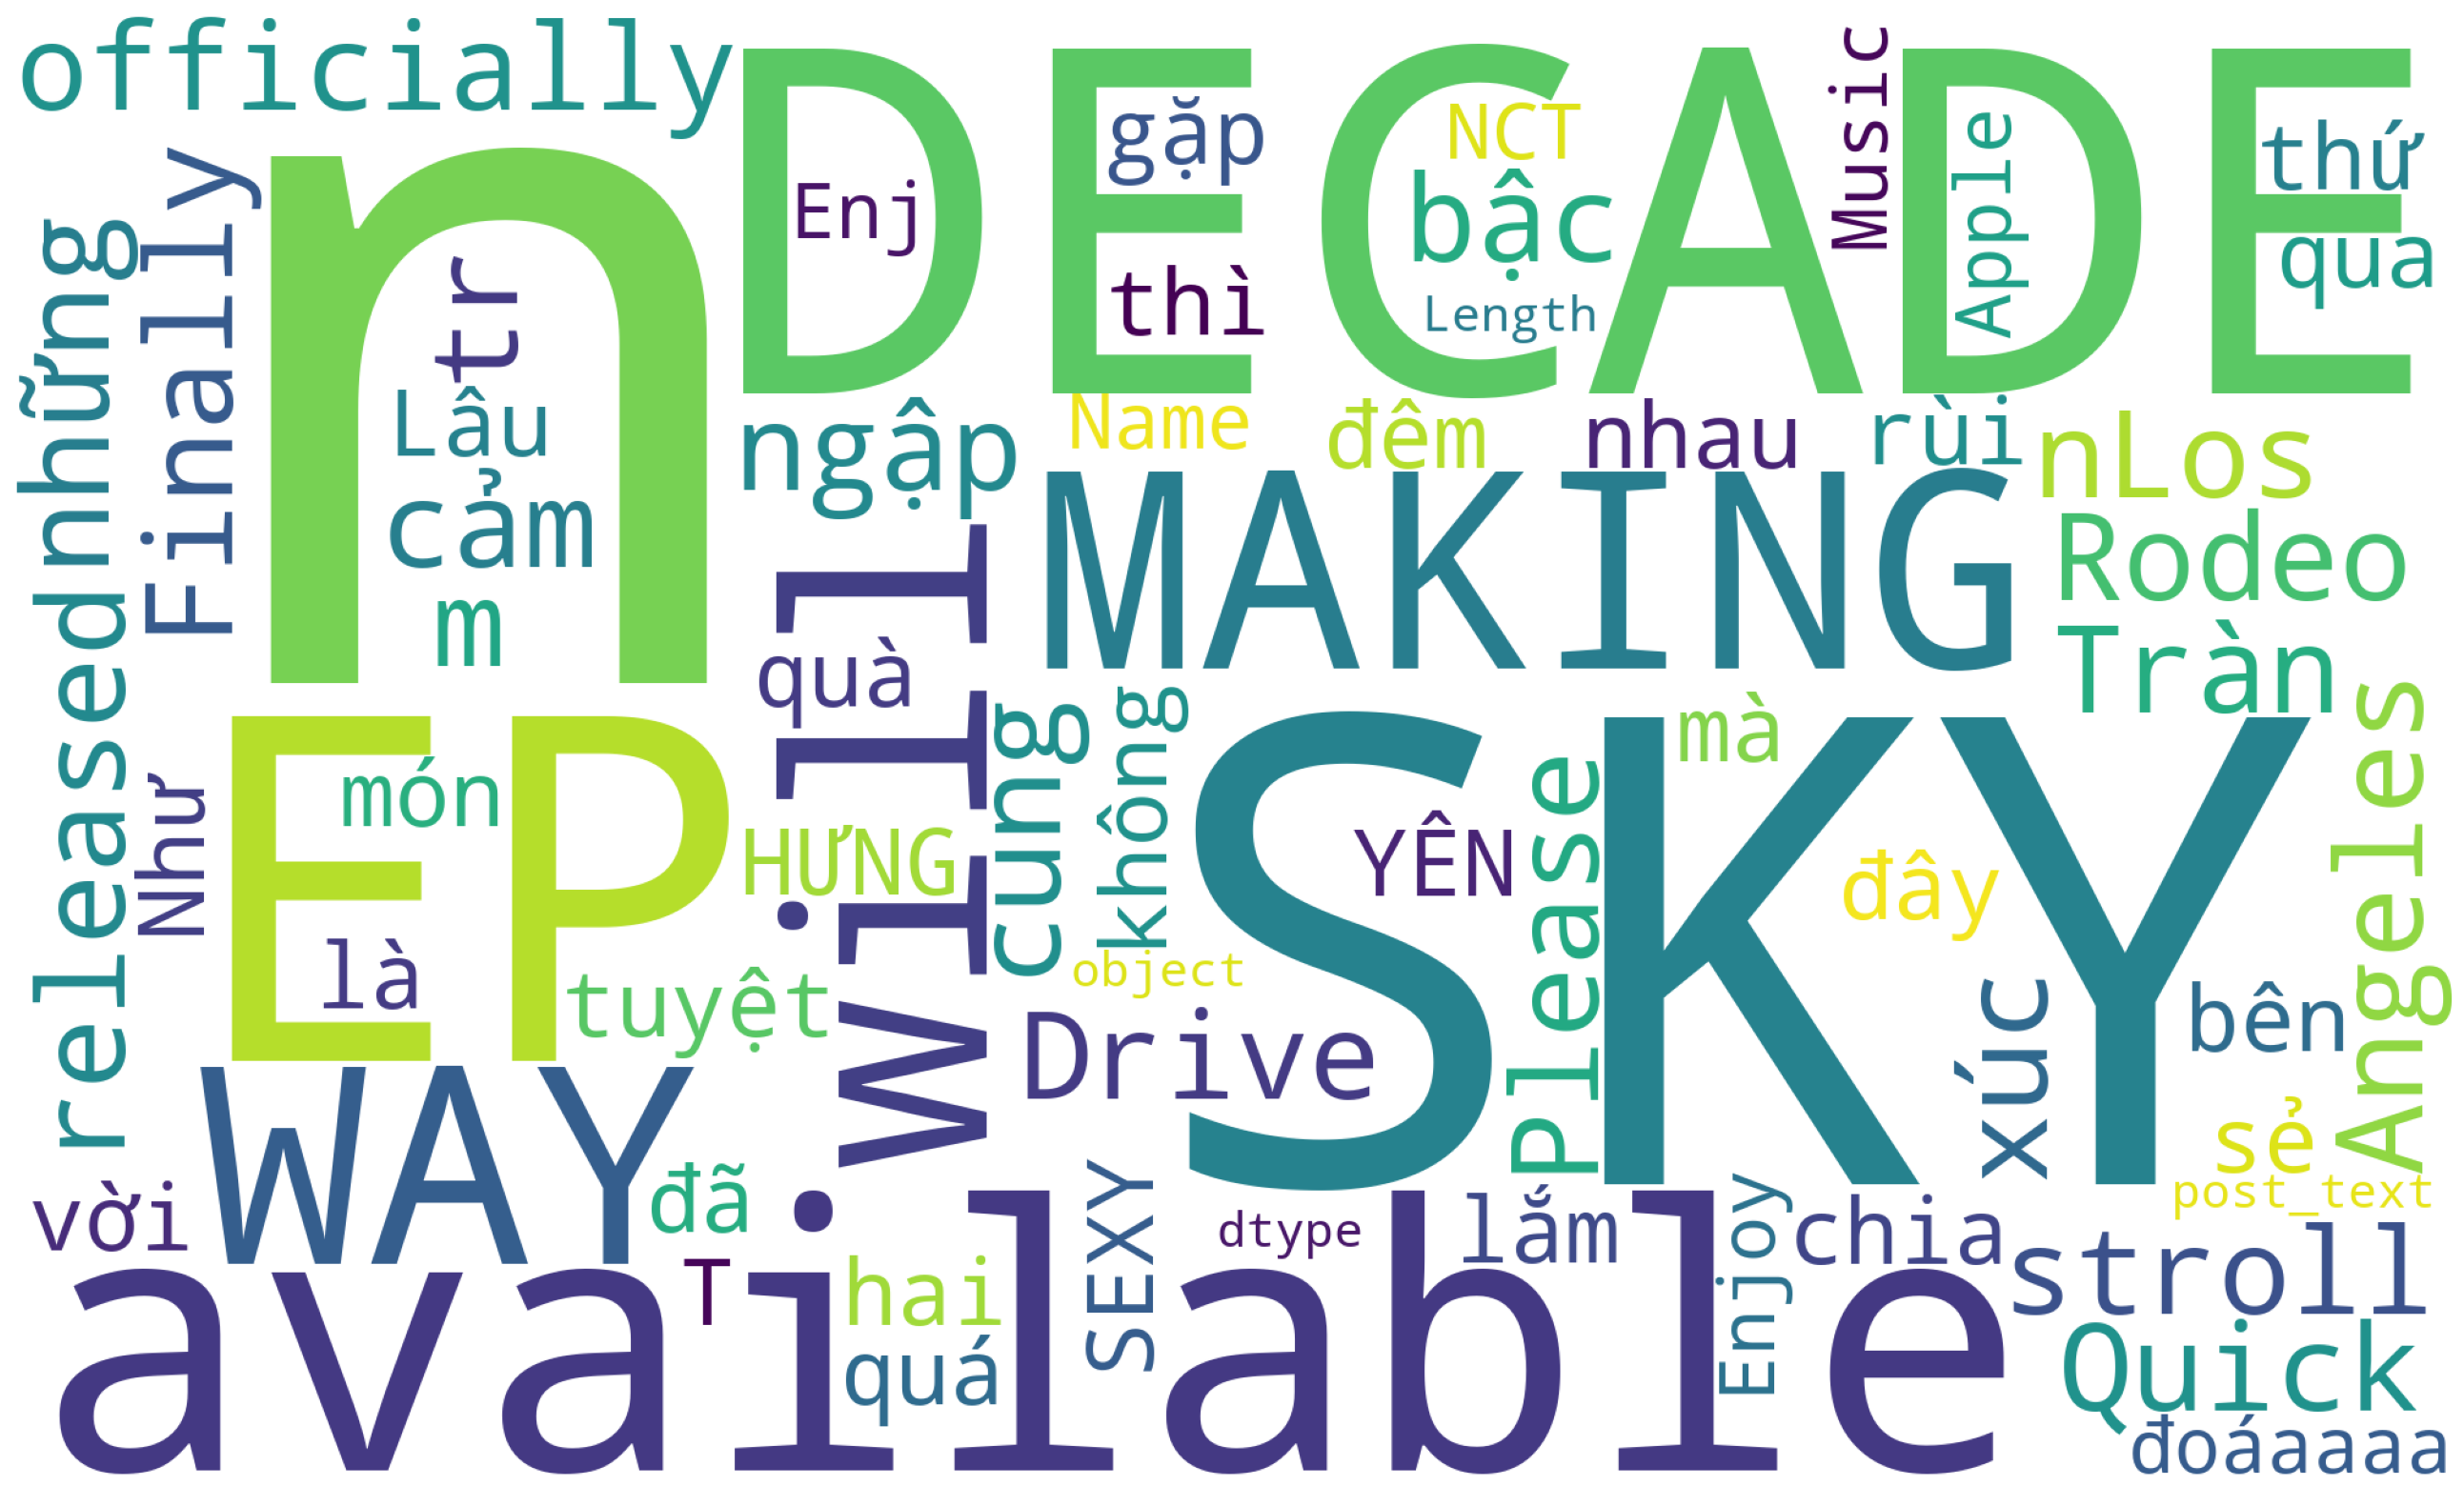

In [12]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
raw_df.head()

,original_request_url,post_url,post_id,text,post_text,shared_text,original_text,time,timestamp,image,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,https://facebook.com/MTP.Fan/posts/79822140832...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid0365FumFYrvxgmKJGJzbvd9mmRQyb38GKVPf3pkYy...,MAKING MY WAY will be officially released at 0...,MAKING MY WAY will be officially released at 0...,NaN,NaN,2023-04-25 20:00:00,NaN,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://facebook.com/MTP.Fan/posts/79708888177...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid0GMYfP2ZYrSTGqcrCSkFyQTZm3nv3Cn26tdAviYYU...,…🤫,…🤫,NaN,NaN,2023-04-23 20:00:00,NaN,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://facebook.com/MTP.Fan/posts/77617866719...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid0Ptc6oLei2WFwSWqY3tXhrfQgQSD6RMBKfZCzCKwb...,Quick stroll on Rodeo Drive 🍦✨😌,Quick stroll on Rodeo Drive 🍦✨😌,NaN,NaN,2023-03-15 20:00:00,NaN,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://facebook.com/MTP.Fan/posts/77212573760...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid038GGZxxJkdBDqPUXwVuERDEs2vaW6ZC567hXa71v...,"Finally, I’m here….\n🕊\nLos Angeles… Please tr...","Finally, I’m here….\n🕊\nLos Angeles… Please tr...",NaN,NaN,2023-03-08 20:00:00,NaN,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://facebook.com/MTP.Fan/posts/76961372452...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid071RnaDhQGJ4VfFv6rCBpgFYvZcDrof6UzxmJjhLx...,Tràn ngập những cung bậc cảm xúc tuyệt vời bên...,Tràn ngập những cung bậc cảm xúc tuyệt vời bên...,NaN,NaN,2023-03-04 12:21:00,NaN,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
raw_df.describe()

,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,video_width,likes,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
count,0.0,0.0,0.0,0.0,2.800000e+01,0.0,0.0,0.0,0.0,86.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,1.012776e+15,NaN,NaN,NaN,NaN,231985.895349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.670643e+14,NaN,NaN,NaN,NaN,131903.863360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.600579e+14,NaN,NaN,NaN,NaN,24007.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,7.172457e+14,NaN,NaN,NaN,NaN,139158.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.094159e+14,NaN,NaN,NaN,NaN,226433.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.316484e+15,NaN,NaN,NaN,NaN,324500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2.516129e+15,NaN,NaN,NaN,NaN,608000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
